# Explore here

In [5]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()



True

In [6]:
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager= SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))

In [19]:
id_artista = '0lAWpj5szCSwM4rUMHYmrr'

response = con.artist_top_tracks(id_artista)
tracks = response['tracks']

print(tracks)

[{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0lAWpj5szCSwM4rUMHYmrr'}, 'href': 'https://api.spotify.com/v1/artists/0lAWpj5szCSwM4rUMHYmrr', 'id': '0lAWpj5szCSwM4rUMHYmrr', 'name': 'Måneskin', 'type': 'artist', 'uri': 'spotify:artist:0lAWpj5szCSwM4rUMHYmrr'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/2qJw6w5XwQO0PQlSWPu7Tw'}, 'href': 'https://api.spotify.com/v1/albums/2qJw6w5XwQO0PQlSWPu7Tw', 'id': '2qJw6w5XwQO0PQlSWPu7Tw', 'images': [{'url': 'https://i.scdn.co/image/ab67616d0000b273fa0ab3a28b5c52d8a5f97045', 'width': 640, 'height': 640}, {'url': 'https://i.scdn.co/image/ab67616d00001e02fa0ab3a28b5c52d8a5f97045', 'width': 300, 'height': 300}, {'url': 'https://i.scdn.co/image/ab67616d00004851fa0ab3a28b5c52d8a5f97045', 'width': 64, 'height': 64}], 'is_playable': True, 'name': 'Chosen', 'release_date': '2017-12-08', 'release_date_precision': 'day', 'total_tracks': 7, 'type': 'album', 'uri': 'spotify:album:

In [20]:
df_tracks = pd.DataFrame.from_records(tracks)
df_tracks.sort_values(['popularity'], inplace = True)

print(df_tracks.head(3))


                                               album  \
8  {'album_type': 'album', 'artists': [{'external...   
6  {'album_type': 'album', 'artists': [{'external...   
5  {'album_type': 'album', 'artists': [{'external...   

                                             artists  disc_number  \
8  [{'external_urls': {'spotify': 'https://open.s...            1   
6  [{'external_urls': {'spotify': 'https://open.s...            1   
5  [{'external_urls': {'spotify': 'https://open.s...            1   

   duration_ms  explicit              external_ids  \
8       186809      True  {'isrc': 'ITB002100961'}   
6       148064     False  {'isrc': 'ITB002200385'}   
5       167276     False  {'isrc': 'ITB002301189'}   

                                       external_urls  \
8  {'spotify': 'https://open.spotify.com/track/7o...   
6  {'spotify': 'https://open.spotify.com/track/0e...   
5  {'spotify': 'https://open.spotify.com/track/5U...   

                                                href    

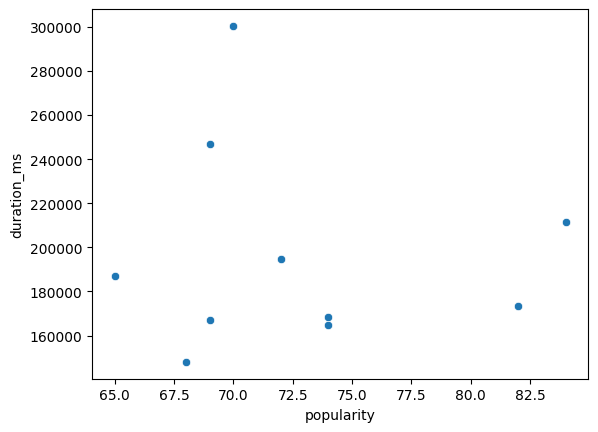

In [22]:
diagrama_de_correlacion = sns.scatterplot(data=df_tracks,x='popularity',y='duration_ms')
fig = diagrama_de_correlacion.get_figure()
fig.savefig('scatter_plot.png')
